In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ai_job_dataset.csv")
df_cleaned = df.dropna()

filter = df_cleaned['company_location'] == 'United States'
df_cleaned = df_cleaned[filter]

df_grouped = df_cleaned.groupby(['job_title', 'experience_level'])['salary_usd']
df_grouped = df_grouped.mean()
df_grouped = df_grouped.reset_index(name='value')

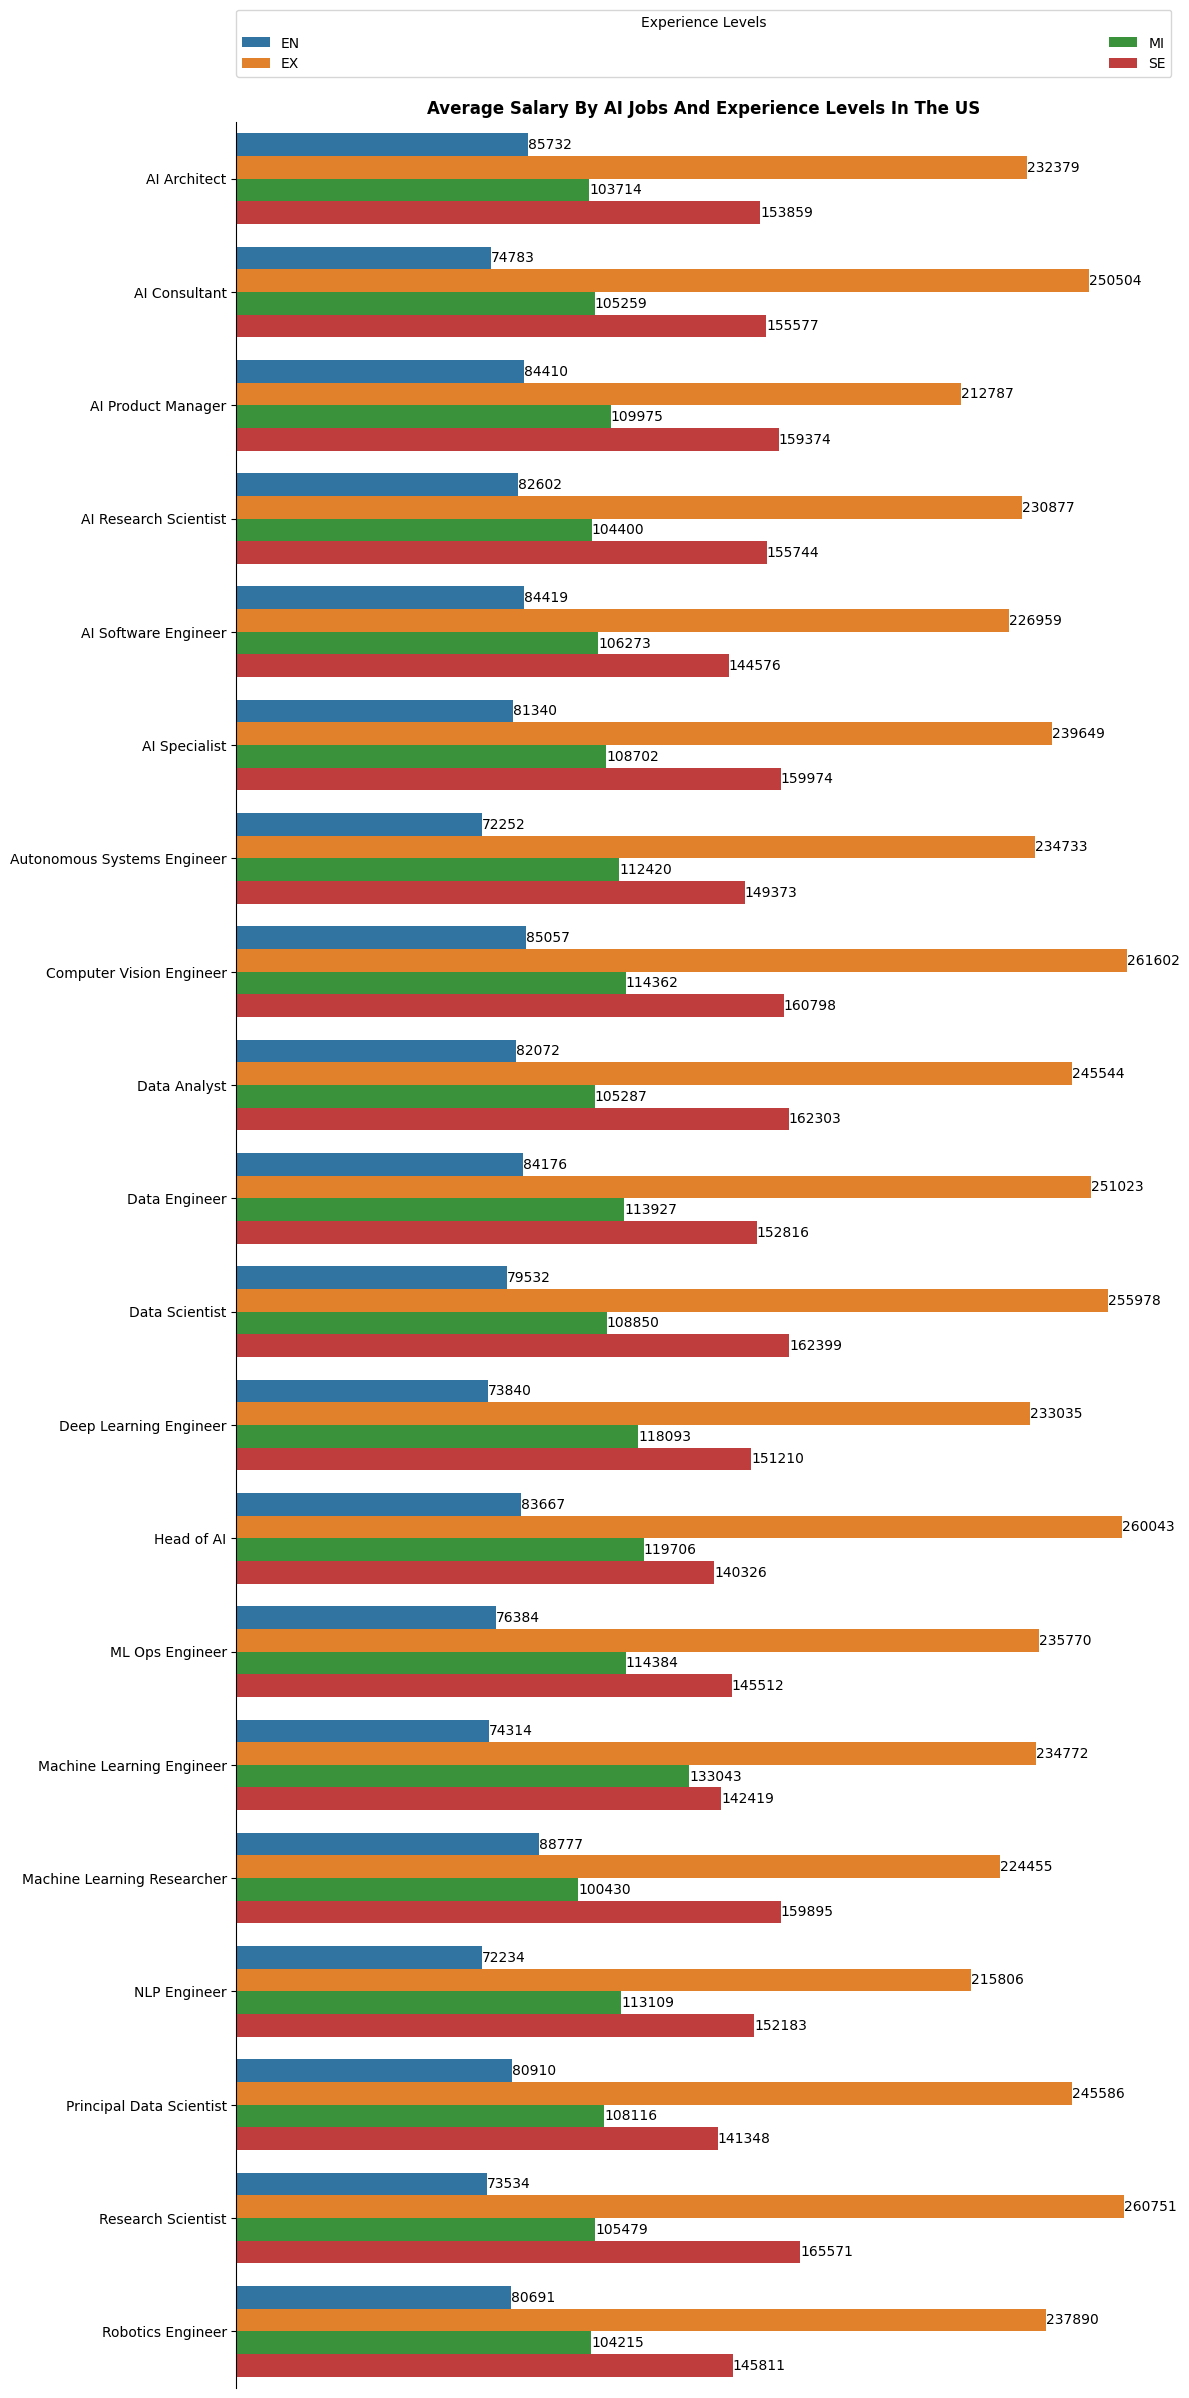

In [ ]:
fig, ax = plt.subplots(figsize=(12, 24))

sns.barplot(data=df_grouped, orient='h', ax=ax, x='value', y='job_title', hue='experience_level')

for container in ax.containers: 
    ax.bar_label(container, fmt="%.0f")

ax.set_title("Average Salary By AI Jobs And Experience Levels In The US", fontweight="bold")
ax.set_ylabel("")
ax.xaxis.set_visible(False)
sns.despine(bottom=True)
ax.legend(title="Experience Levels", loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", borderaxespad=0, ncol=2)

plt.tight_layout()
plt.show()